# CMSE 202 Honors Project

### Introduction 

Understanding human mobility isn't merely an academic pursuit; it holds the key to addressing numerous socio-economic challenges, ranging from alleviating urban traffic congestion to safeguarding public health.

Take, for instance, the critical role human mobility plays in the dissemination of infectious diseases like COVID-19. The way people move within and between communities directly influences the spread of contagion. By delving into the complexities of human mobility, we gain insights that can inform proactive measures, enabling us to predict disease dynamics and implement targeted interventions before crises escalate. Central to the study of human mobility is the art of modeling and predicting its intricate patterns. With accurate models, we can get the power to monitor, manage, and optimize human movement, fostering more efficient and resilient societies.

### Data

To embark on our exploration of human mobility patterns, we turn to the Multiscale Dynamic Human Mobility Flow Dataset, a comprehensive repository of movement dynamics across the United States during the COVID-19 pandemic. This dataset, meticulously compiled by Yuhao Kang, Song Gao, Yunlei Liang, Mingxiao Li, and Jake Kruse, offers a granular view of weekly human mobility flows from January 2019 to December 2021.

Comprising weekly visit flow data between 52 distinct places—encompassing the 50 states, Washington D.C., and Puerto Rico—this dataset is a treasure trove of insights. Each movement in the dataset is a result of human population flow between origins and destinations. From unique identifiers delineating geographic units to estimates of visitor and population flows, the dataset provides a rich canvas upon which to paint our exploration of human mobility patterns.

In our project, we hone in on three fundamental attributes—geoid_o, geoid_d, and pop_flows—each a piece of the puzzle in deciphering the mysteries of human mobility. 	

* geoid_d: Each number represents a destination
* geoid_o: Each number represents an origin
* pop_flows: The number of population from the origin to the destination in the range of time.


### Cleaning the Data

In [3]:
import pandas as pd
import os

# Path to the directory containing the CSV files
directory = '/Users/prachurjodas/Downloads/COVID19USFlows-WeeklyFlows/weekly_flows/state2state'

# List to store DataFrames
dfs = []

# Iterate through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        # Read the CSV file into a DataFrame
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate all DataFrames in the list vertically
merged_df = pd.concat(dfs, ignore_index=True)

# Write the merged DataFrame to a new CSV file
merged_df.to_csv('merged_dataset.csv', index=False)

print("Merged CSV files into 'merged_dataset.csv'")

Merged CSV files into 'merged_dataset.csv'


In [2]:
df = pd.read_csv("merged_dataset.csv", delimiter= ",")


print(df.head())

   geoid_o  geoid_d      lng_o     lat_o       lng_d      lat_d  \
0        1        1 -86.844521  32.75688  -86.844521  32.756880   
1        1        2 -86.844521  32.75688 -151.250549  63.788469   
2        1        4 -86.844521  32.75688 -111.664460  34.293095   
3        1        5 -86.844521  32.75688  -92.439237  34.899772   
4        1        6 -86.844521  32.75688 -119.663846  37.215308   

            date_range  visitor_flows   pop_flows  \
0  07/20/20 - 07/26/20        2922199  32907597.0   
1  07/20/20 - 07/26/20            177      1993.0   
2  07/20/20 - 07/26/20           1433     16137.0   
3  07/20/20 - 07/26/20           2779     31294.0   
4  07/20/20 - 07/26/20           2846     32049.0   

   number_devices_primary_daytime  census_block_group  
0                             NaN                 NaN  
1                             NaN                 NaN  
2                             NaN                 NaN  
3                             NaN                 NaN 

In [3]:
cleaned_df = df[["geoid_o", "geoid_d", "date_range", "pop_flows"]]

# Display the first few rows of the cleaned dataset
print(cleaned_df.head())

   geoid_o  geoid_d           date_range   pop_flows
0        1        1  07/20/20 - 07/26/20  32907597.0
1        1        2  07/20/20 - 07/26/20      1993.0
2        1        4  07/20/20 - 07/26/20     16137.0
3        1        5  07/20/20 - 07/26/20     31294.0
4        1        6  07/20/20 - 07/26/20     32049.0


In [4]:
# Split the date_range column into start_date and end_date
cleaned_df[['start_date', 'end_date']] = cleaned_df['date_range'].str.split(' - ', expand=True)

# Drop the original date_range column
cleaned_df.drop('date_range',  axis=1, inplace=True)
cleaned_df.drop('end_date',  axis=1, inplace=True)

print(cleaned_df)

        geoid_o  geoid_d   pop_flows start_date
0             1        1  32907597.0   07/20/20
1             1        2      1993.0   07/20/20
2             1        4     16137.0   07/20/20
3             1        5     31294.0   07/20/20
4             1        6     32049.0   07/20/20
...         ...      ...         ...        ...
345032       72       51     11255.0   09/14/20
345033       72       53      1429.0   09/14/20
345034       72       55     10630.0   09/14/20
345035       72       56       714.0   09/14/20
345036       72       72   5806378.0   09/14/20

[345037 rows x 4 columns]


In [5]:
print("The number of observation we have is", df.shape[0])

The number of observation we have is 345037


In [8]:
# Save the cleaned DataFrame to a CSV file
cleaned_df.to_csv('cleaned_df.csv', index=False)

In [6]:
cleaned_df.isnull().sum()

geoid_o       0
geoid_d       0
pop_flows     0
start_date    0
dtype: int64

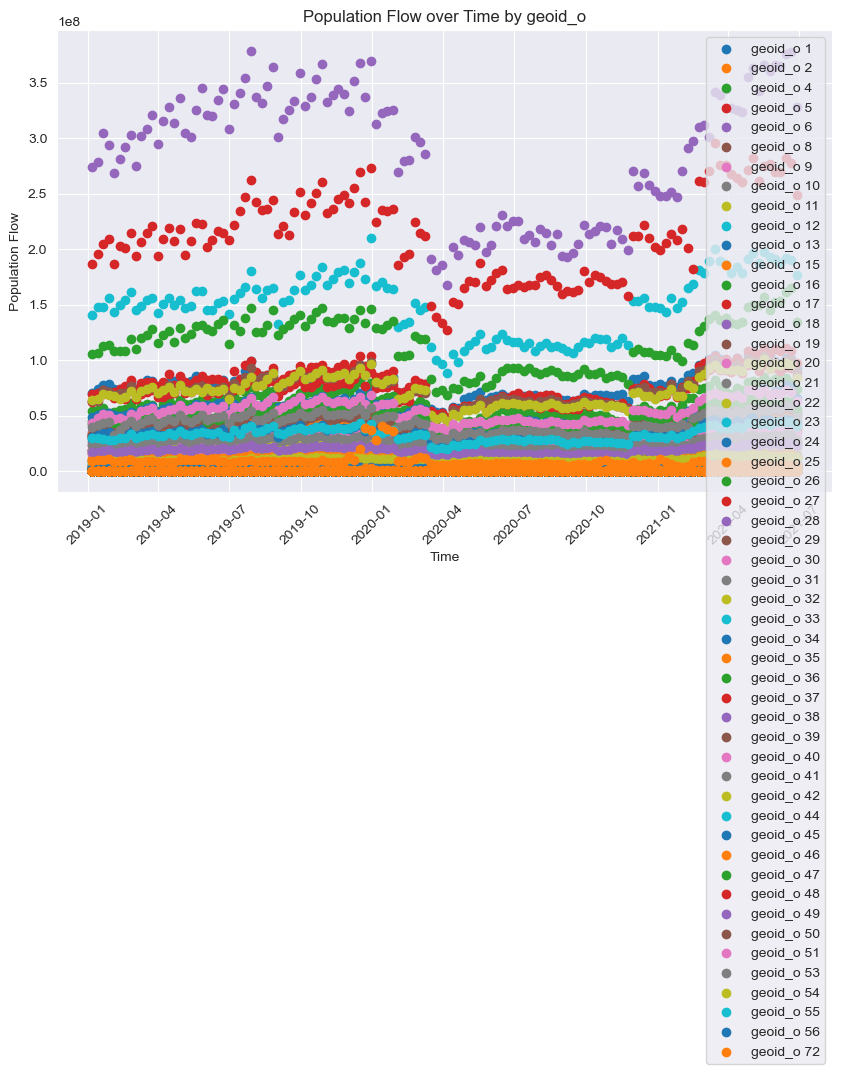

In [8]:
cleaned_df['start_date'] = pd.to_datetime(cleaned_df['start_date'], format='%m/%d/%y')

# Get unique geoid_o values
geoid_o_values = cleaned_df['geoid_o'].unique()

# Plot each geoid_o separately with a different color or marker
plt.figure(figsize=(10, 6))
for geoid_o in geoid_o_values:
    df_subset = cleaned_df[cleaned_df['geoid_o'] == geoid_o]
    plt.scatter(df_subset['start_date'], df_subset['pop_flows'], marker='o', label=f'geoid_o {geoid_o}')

plt.xlabel('Time')
plt.ylabel('Population Flow')
plt.title('Population Flow over Time by geoid_o')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

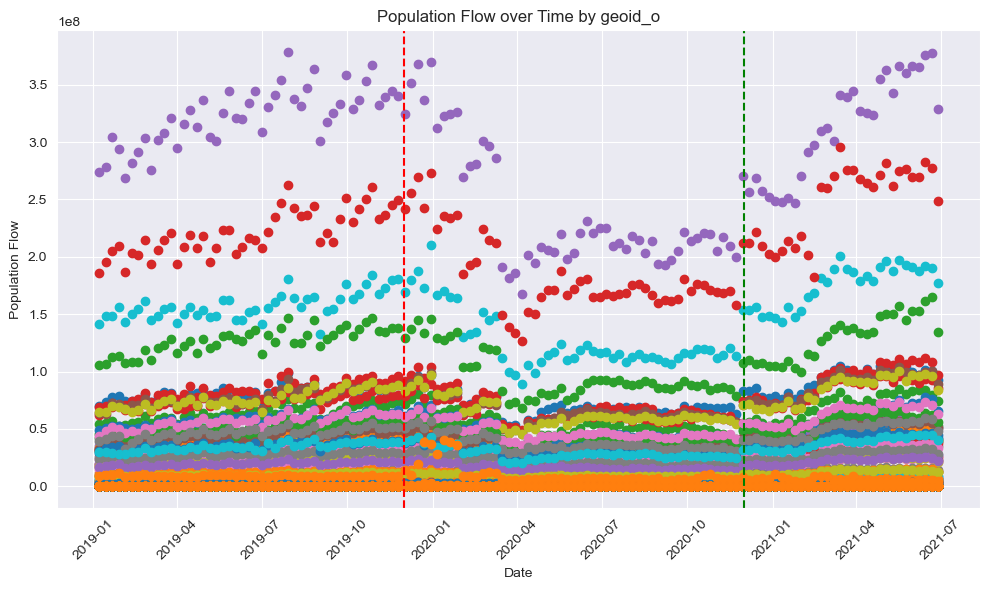

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'cleaned_df' is your DataFrame

# Convert 'start_date' and 'end_date' columns to datetime objects
cleaned_df['start_date'] = pd.to_datetime(cleaned_df['start_date'], format='%m/%d/%y')

# Get unique geoid_o values
geoid_o_values = cleaned_df['geoid_o'].unique()

# Plot each geoid_o separately with a different color or marker
plt.figure(figsize=(10, 6))
for geoid_o in geoid_o_values:
    df_subset = cleaned_df[cleaned_df['geoid_o'] == geoid_o]
    plt.scatter(df_subset['start_date'], df_subset['pop_flows'], marker='o', label=f'geoid_o {geoid_o}')

# Add a vertical line at x = 2019-12
plt.axvline(pd.to_datetime('2019-12'), color='r', linestyle='--', label='Start of COVID-19 Pandemic')
plt.axvline(pd.to_datetime('2020-12'), color='g', linestyle='--', label='End of First Wave')

plt.xlabel('Date')
plt.ylabel('Population Flow')
plt.title('Population Flow over Time by geoid_o')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

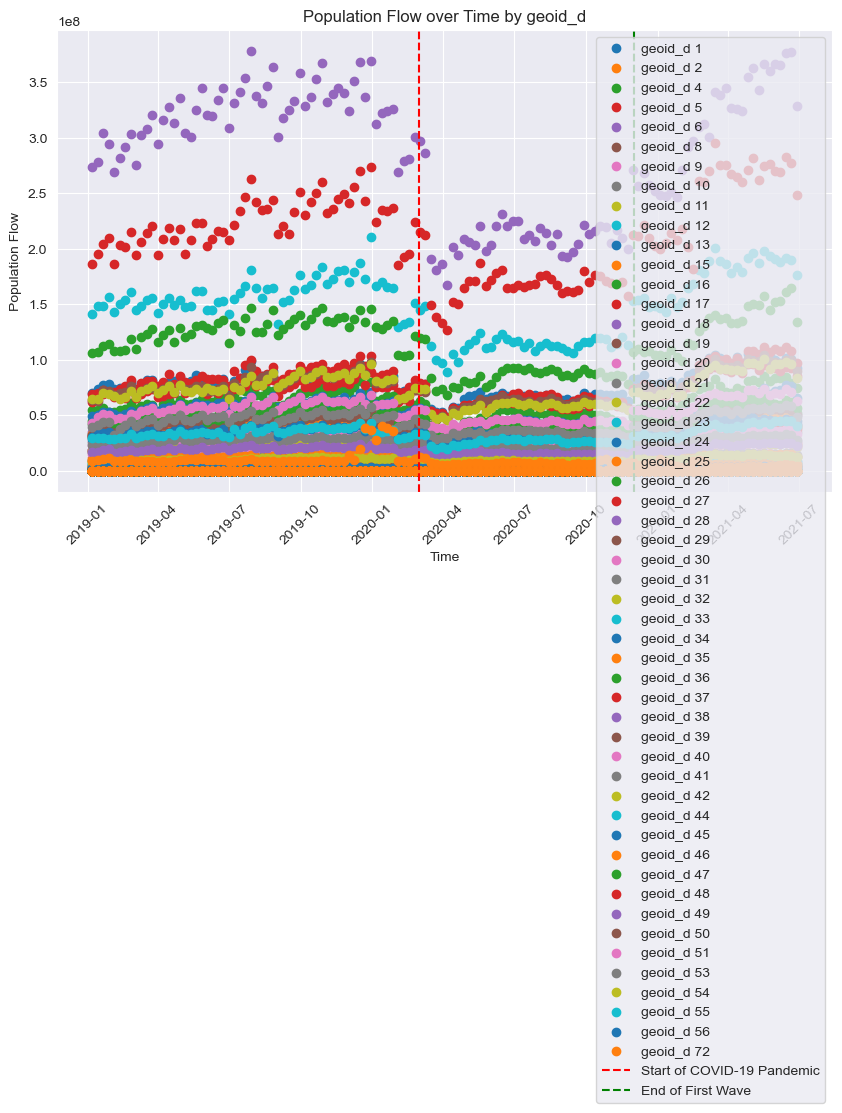

<Figure size 640x480 with 0 Axes>

In [55]:
cleaned_df['start_date'] = pd.to_datetime(cleaned_df['start_date'], format='%m/%d/%y')

# Get unique geoid_d values
geoid_d_values = cleaned_df['geoid_d'].unique()

# Plot each geoid_d separately with a different color or marker
plt.figure(figsize=(10, 6))
for geoid_d in geoid_d_values:
    df_subset = cleaned_df[cleaned_df['geoid_d'] == geoid_d]
    plt.scatter(df_subset['start_date'], df_subset['pop_flows'], marker='o', label=f'geoid_d {geoid_d}')


plt.axvline(pd.to_datetime('2020-03'), color='r', linestyle='--', label='Start of COVID-19 Pandemic')
plt.axvline(pd.to_datetime('2020-12'), color='g', linestyle='--', label='End of First Wave')

plt.xlabel('Time')
plt.ylabel('Population Flow')
plt.title('Population Flow over Time by geoid_d')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('testplot.jpeg')

# Using Linear Regression

### Rationale for adopting the Model

Linear regression could help in predicting the population flows (pop_flows) from one geographical area (geoid_o) to another (geoid_d). The features geoid_o, geoid_d, and start_date could be used as independent variables to predict the population flows. Linear regression provides coefficients for each independent variable, which can be interpreted to understand the relationship between the features and the target variable (pop_flows). For example, you can interpret how much the population flows change for a unit change in geoid_o or geoid_d. If start_date is considered as a feature, linear regression can help understand if and how the start date affects population flows. It can show whether there's a trend in population flows over time and how significant it is.

### Data Fitting Process (using training data)

The training data process in the provided code involves several steps to prepare the dataset for training a linear regression model. Firstly, the dataset is loaded from a CSV file named "cleaned_df.csv" using the Pandas library. This dataset likely contains information about population flows between geographical areas, including features such as the originating and destination geoids, the start date of the flow, and the population flows themselves.

Upon loading the dataset, the 'start_date' column is converted to a datetime format to facilitate further processing. Additionally, the month and day components are extracted from the start date and stored in separate columns ('start_month' and 'start_day', respectively). This step allows the model to potentially capture any seasonal or temporal patterns in the data.

Next, the original 'start_date' column is dropped from the dataset as it has been replaced by the extracted month and day features. The dataset is then split into features (X) and the target variable (y), where the target variable represents the population flows ('pop_flows'), and the features include all other relevant columns except 'pop_flows'.

The dataset is further divided into training and testing sets using the train_test_split function from scikit-learn. The training set comprises 80% of the data, which the model will use to learn the relationships between the features and the target variable. The remaining 20% of the data is reserved for testing the trained model's performance.

Finally, a Linear Regression model is initialized, trained using the training data, and evaluated on the testing set. The model's performance metrics, including mean squared error (MSE), root mean squared error (RMSE), and R-squared (R²) score, are computed to assess how well the model predicts population flows based on the provided features. Additionally, a scatter plot is generated to visually compare the actual population flows with the model's predictions, providing further insights into the model's performance.

Firstly, a constant term, often referred to as an intercept, is added to the feature matrix X_train using the add_constant function from the statsmodels library. This constant term ensures that the linear regression model accounts for the intercept, which represents the predicted value of the target variable when all independent variables are zero.

/var/folders/h9/ywk3l7f10fnc9g5m401c04h80000gn/T/ipykernel_13891/1506454387.py:13: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Mean Squared Error: 84395443426395.12
Root Mean Squared Error: 9186699.267222974
R^2 Score: 0.0003835570864189064


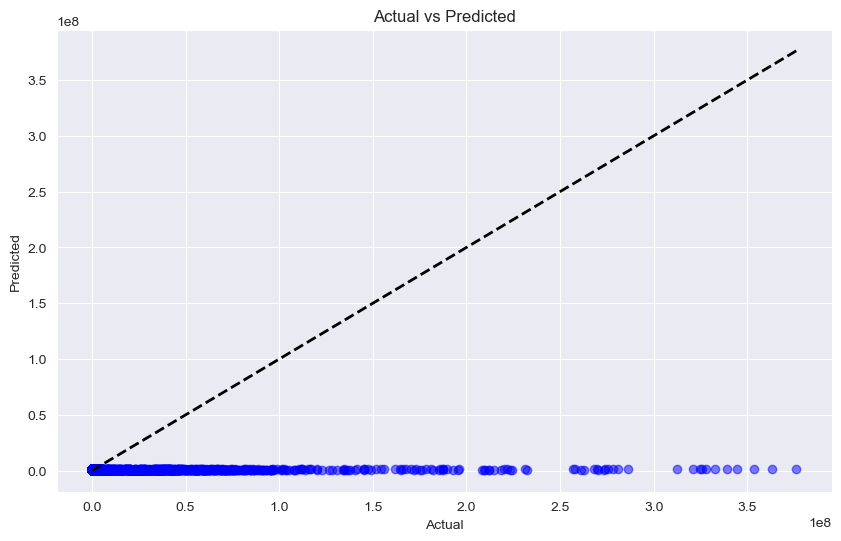

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#1

cleaned_df = pd.read_csv("cleaned_df.csv")

# Convert start_date to datetime
cleaned_df['start_date'] = pd.to_datetime(cleaned_df['start_date'])

# Extract month and day from the start_date
cleaned_df['start_month'] = cleaned_df['start_date'].dt.month
cleaned_df['start_day'] = cleaned_df['start_date'].dt.day

# Drop the original start_date column
cleaned_df.drop('start_date', axis=1, inplace=True)

# Split the data into features (X) and target variable (y)
X = cleaned_df.drop('pop_flows', axis=1)
y = cleaned_df['pop_flows']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

Next, the Ordinary Least Squares (OLS) method from statsmodels is employed to fit the linear regression model. This method takes the target variable y_train and the augmented feature matrix X_train_sm as inputs and calculates the coefficients for the linear regression equation that minimize the sum of squared residuals between the observed and predicted values.

Once the model is fitted, a plot is generated to visualize the distribution of residuals. Residuals represent the differences between the observed and predicted values of the target variable and are an essential aspect of assessing the model's performance and assumptions.
The plot_regress_exog function from statsmodels.graphics module is used to create the plot. Specifically, the plot illustrates the relationship between one of the independent variables, 'geoid_o', and the residuals of the fitted model.

/Users/prachurjodas/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



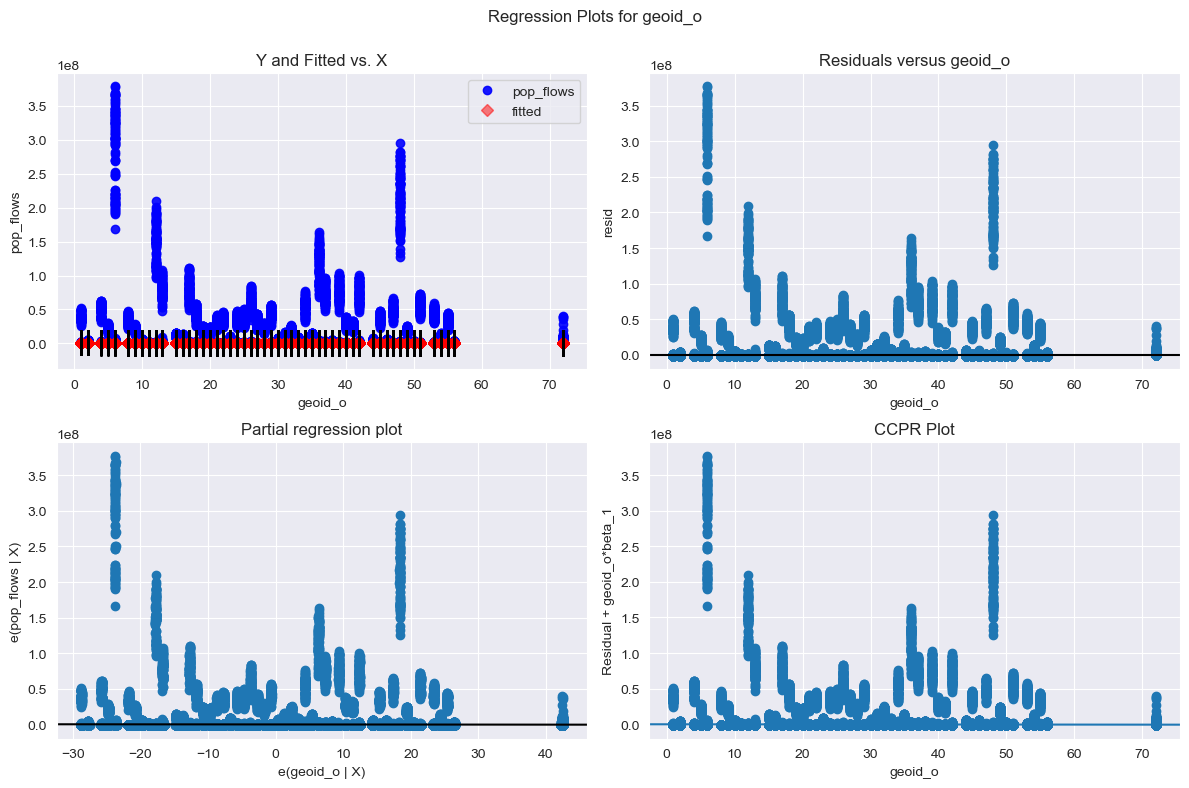

In [17]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

#2

# Add constant to the independent variables matrix for statsmodels
X_train_sm = sm.add_constant(X_train)

# Fit the Linear Regression model using statsmodels
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Plot the distribution of residuals
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(model_sm, 'geoid_o', fig=fig)
plt.show()

### Prediction by the Model

Predictions are made using a trained linear regression model for a specific period spanning from July 2021 to December 2021. The process begins by generating a list of dates representing each week within the specified period. This is achieved using the pd.date_range() function from the pandas library, which creates a sequence of dates starting from July 1, 2021, to December 31, 2021, with a weekly frequency. These dates will serve as the basis for predicting population flows over the upcoming months.

Following the generation of dates, a DataFrame named period_df is created to encompass all potential combinations of geographical areas (geoid_o and geoid_d), start months, and start days for the designated period. This DataFrame is constructed using list comprehension, which iterates over unique pairs of geographical areas and dates, forming tuples with corresponding start months and start days for each combination.

Subsequently, predictions are made utilizing the trained linear regression model (model) on the period_df DataFrame, encompassing all possible combinations of features within the specified period. The predict() function is applied to estimate the population flows for each combination of geographical areas, start months, and start days, based on the learned relationships derived from the training data.

The predicted population flows are then integrated into the `period_df`

In [19]:
import pandas as pd

#3

# Create a list of dates for the period July 2021 to December 2021
dates = pd.date_range(start='2021-07-01', end='2021-12-31', freq='W')

# Create a DataFrame with all combinations of geoid_o, geoid_d, start_month, and start_day for the period
period_df = pd.DataFrame([(o, d, date.month, date.day) for o in cleaned_df['geoid_o'].unique() 
                          for d in cleaned_df['geoid_d'].unique() for date in dates],
                         columns=['geoid_o', 'geoid_d', 'start_month', 'start_day'])

# Make predictions using the trained model
predictions = model.predict(period_df)

# Add the predictions to the DataFrame
period_df['pop_flows_predicted'] = predictions

# Display the DataFrame with predictions
print(period_df.head())

   geoid_o  geoid_d  start_month  start_day  pop_flows_predicted
0        1        1            7          4         1.271706e+06
1        1        1            7         11         1.293141e+06
2        1        1            7         18         1.314576e+06
3        1        1            7         25         1.336011e+06
4        1        1            8          1         1.263041e+06


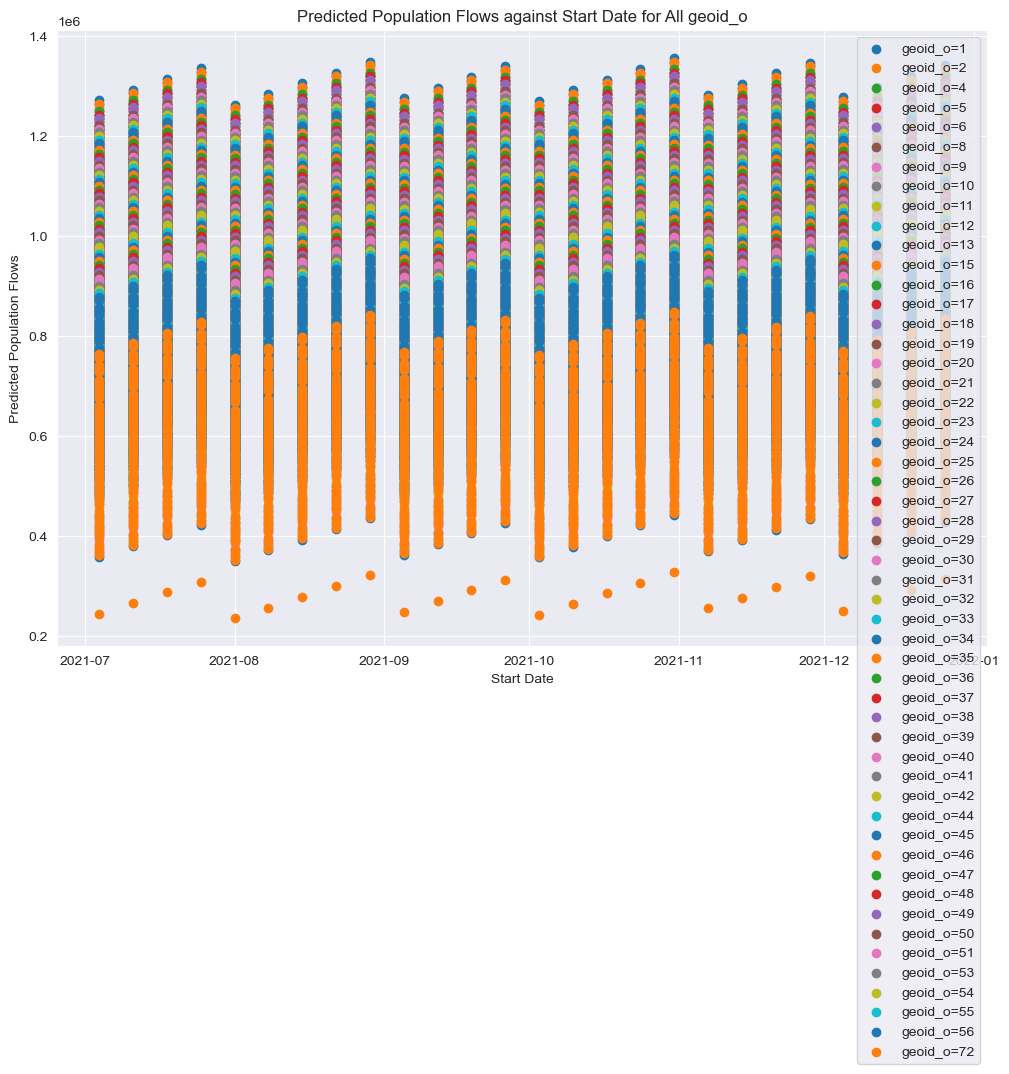

In [20]:
period_df['start_date'] = pd.to_datetime(period_df['start_month'].astype(str) + '/' + period_df['start_day'].astype(str) + '/2021')

# Plot pop_flows_predicted against start_date for each unique value of geoid_o
unique_geoid_o = period_df['geoid_o'].unique()

plt.figure(figsize=(12, 8))

for geoid_o in unique_geoid_o:
    data_geoid_o = period_df[period_df['geoid_o'] == geoid_o]
    plt.scatter(data_geoid_o['start_date'], data_geoid_o['pop_flows_predicted'], label=f'geoid_o={geoid_o}')

plt.xlabel('Start Date')
plt.ylabel('Predicted Population Flows')
plt.title('Predicted Population Flows against Start Date for All geoid_o')
plt.legend()
plt.grid(True)
plt.show()

### Quantitative evaluation of the model (using testing data)

We visualize the difference for actual and predicted data which compares the actual and predicted population flows over time for different geographical areas. It starts by converting dates to a standardized format for consistency. Then, actual population flows are plotted as circles, each area marked with a distinct color. Predicted population flows are plotted as crosses, following the same color scheme. This allows for a direct comparison between the model's predictions and the actual data. The resulting plot provides a clear overview of how well the model captures population flow trends across various geographical regions over time, aiding in evaluating its performance.

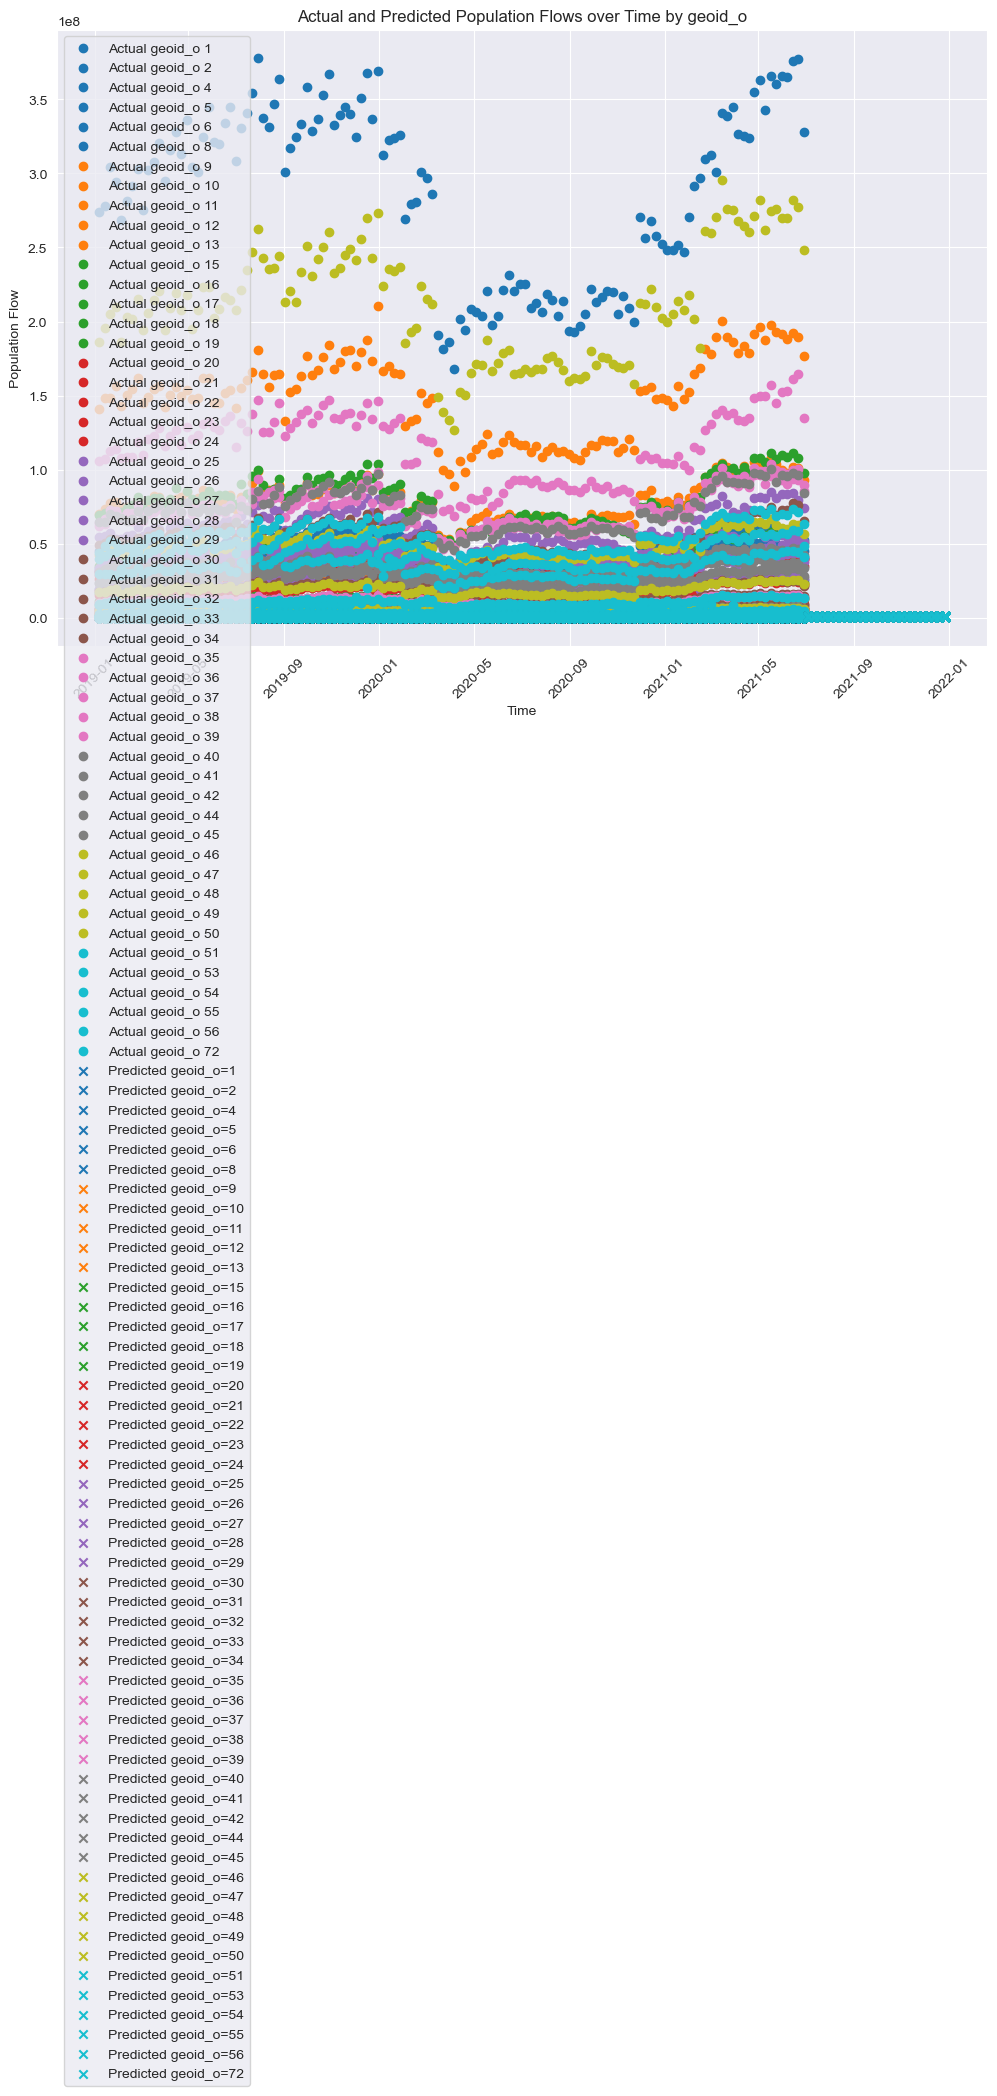

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming cleaned_df and period_df are already defined

# Convert start_date to datetime in cleaned_df
cleaned_df['start_date'] = pd.to_datetime(cleaned_df['start_date'], format='%m/%d/%y')

# Get unique geoid_o values
geoid_o_values = cleaned_df['geoid_o'].unique()

# Assign unique colors to each geoid_o value for actual data
actual_colors = plt.cm.tab10(np.linspace(0, 1, len(geoid_o_values)))

# Create a dictionary to map geoid_o to its color
actual_color_dict = dict(zip(geoid_o_values, actual_colors))

# Plot actual population flows over time by geoid_o
plt.figure(figsize=(12, 8))

for geoid_o in geoid_o_values:
    df_subset = cleaned_df[cleaned_df['geoid_o'] == geoid_o]
    plt.scatter(df_subset['start_date'], df_subset['pop_flows'], marker='o', label=f'Actual geoid_o {geoid_o}', color=actual_color_dict[geoid_o])

# Convert start_date to datetime in period_df
period_df['start_date'] = pd.to_datetime(period_df['start_month'].astype(str) + '/' + period_df['start_day'].astype(str) + '/2021')

# Get unique geoid_o values in period_df
unique_geoid_o = period_df['geoid_o'].unique()

# Assign unique colors to each geoid_o value for predicted data
predicted_colors = plt.cm.tab10(np.linspace(0, 1, len(unique_geoid_o)))

# Create a dictionary to map geoid_o to its color for predicted data
predicted_color_dict = dict(zip(unique_geoid_o, predicted_colors))

# Plot pop_flows_predicted against start_date for each unique value of geoid_o
for geoid_o in unique_geoid_o:
    data_geoid_o = period_df[period_df['geoid_o'] == geoid_o]
    plt.scatter(data_geoid_o['start_date'], data_geoid_o['pop_flows_predicted'], marker='x', label=f'Predicted geoid_o={geoid_o}', color=predicted_color_dict[geoid_o])

plt.xlabel('Time')
plt.ylabel('Population Flow')
plt.title('Actual and Predicted Population Flows over Time by geoid_o')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Using Polynomial Regression

In [24]:
#1

from sklearn.preprocessing import PolynomialFeatures

cleaned_df = pd.read_csv("cleaned_df.csv")

cleaned_df['start_date'] = pd.to_datetime(cleaned_df['start_date'], format='%m/%d/%y')

# Convert 'start_date' to numerical representation (number of days since the start of the dataset)
reference_date = cleaned_df['start_date'].min()
cleaned_df['days_since_start'] = (cleaned_df['start_date'] - reference_date).dt.days

# Define features and target variable
X = cleaned_df[['geoid_o', 'geoid_d', 'days_since_start']]
y = cleaned_df['pop_flows']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the degree of the polynomial features
degree = 3  # You can change this to any desired degree

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the training and testing data
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training R-squared:", train_r2)
print("Testing R-squared:", test_r2)

Training MSE: 88089666210774.12
Testing MSE: 83523655322508.66
Training R-squared: 0.01050001110194565
Testing R-squared: 0.010709395638844987


In [25]:
#2

import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import PolynomialFeatures

# Define the period from July 2021 to December 2021
start_date = datetime(2021, 7, 1)
end_date = datetime(2021, 12, 31)
dates = pd.date_range(start=start_date, end=end_date, freq='W')

# Create a DataFrame with all combinations of geoid_o and geoid_d
geoid_o_values = range(1, 53)
geoid_d_values = range(1, 53)
geoid_combinations = [(o, d) for o in geoid_o_values for d in geoid_d_values]

# Initialize an empty list to store data
data = []

# Iterate over each date and repeat the combinations for each date
for date in dates:
    for combination in geoid_combinations:
        data.append((combination[0], combination[1], date))

# Create DataFrame from the collected data
prediction_df = pd.DataFrame(data, columns=['geoid_o', 'geoid_d', 'date'])

# Convert 'date' column to numerical representation (e.g., number of days since the start of the dataset)
reference_date = prediction_df['date'].min()
prediction_df['days_since_start'] = (prediction_df['date'] - reference_date).dt.days

# Create polynomial features
poly_features = PolynomialFeatures(degree=3)
X_poly_pred = poly_features.fit_transform(prediction_df[['geoid_o', 'geoid_d', 'days_since_start']])

# Use the trained model to predict population flows
predictions = model.predict(X_poly_pred)

# Add the predictions to the DataFrame
prediction_df['predicted_pop_flows'] = predictions

# Display the predictions
print(prediction_df.head())

   geoid_o  geoid_d       date  days_since_start  predicted_pop_flows
0        1        1 2021-07-04                 0         6.588704e+06
1        1        2 2021-07-04                 0         6.310341e+06
2        1        3 2021-07-04                 0         6.038878e+06
3        1        4 2021-07-04                 0         5.774203e+06
4        1        5 2021-07-04                 0         5.516202e+06


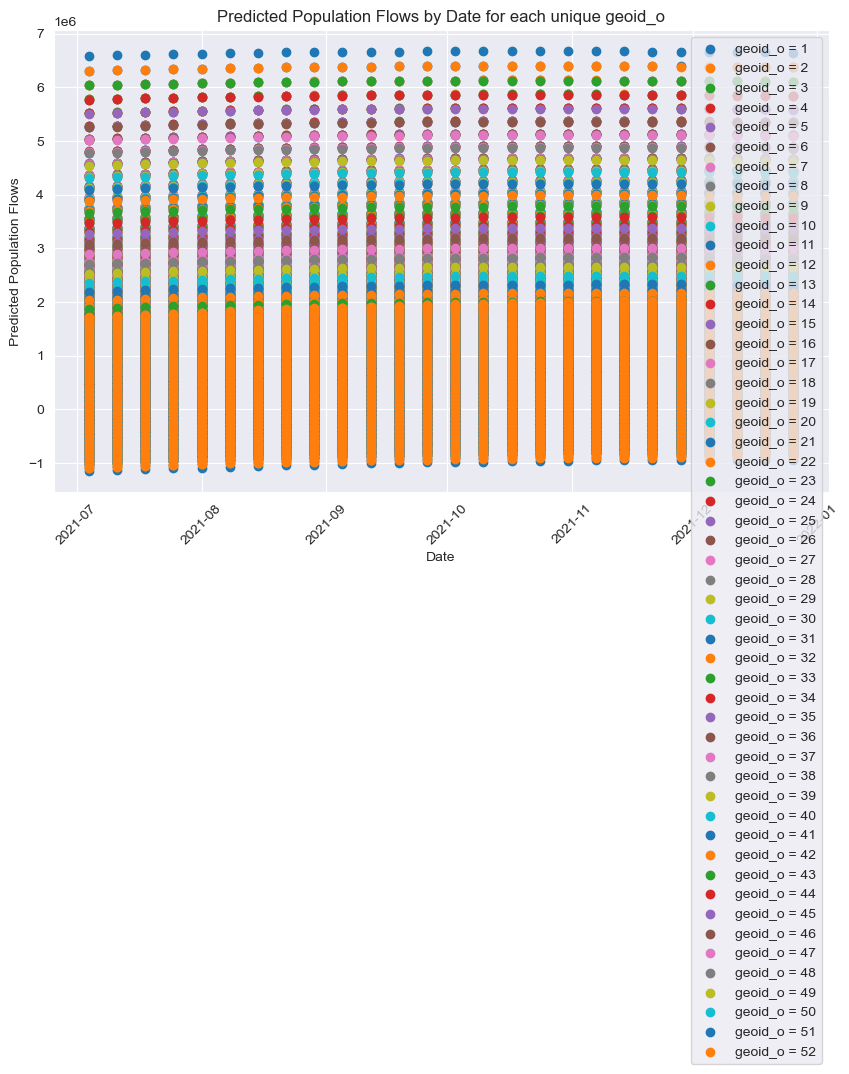

In [198]:
import matplotlib.pyplot as plt

# Get unique geoid_o values
unique_geoid_o = prediction_df['geoid_o'].unique()

# Plot each unique geoid_o separately
plt.figure(figsize=(10, 6))
for geoid_o in unique_geoid_o:
    # Filter DataFrame for the current geoid_o value
    df_subset = prediction_df[prediction_df['geoid_o'] == geoid_o]
    
    # Plot data for the current geoid_o value
    plt.scatter(df_subset['date'], df_subset['predicted_pop_flows'], label=f'geoid_o = {geoid_o}')

plt.xlabel('Date')
plt.ylabel('Predicted Population Flows')
plt.title('Predicted Population Flows by Date for each unique geoid_o')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

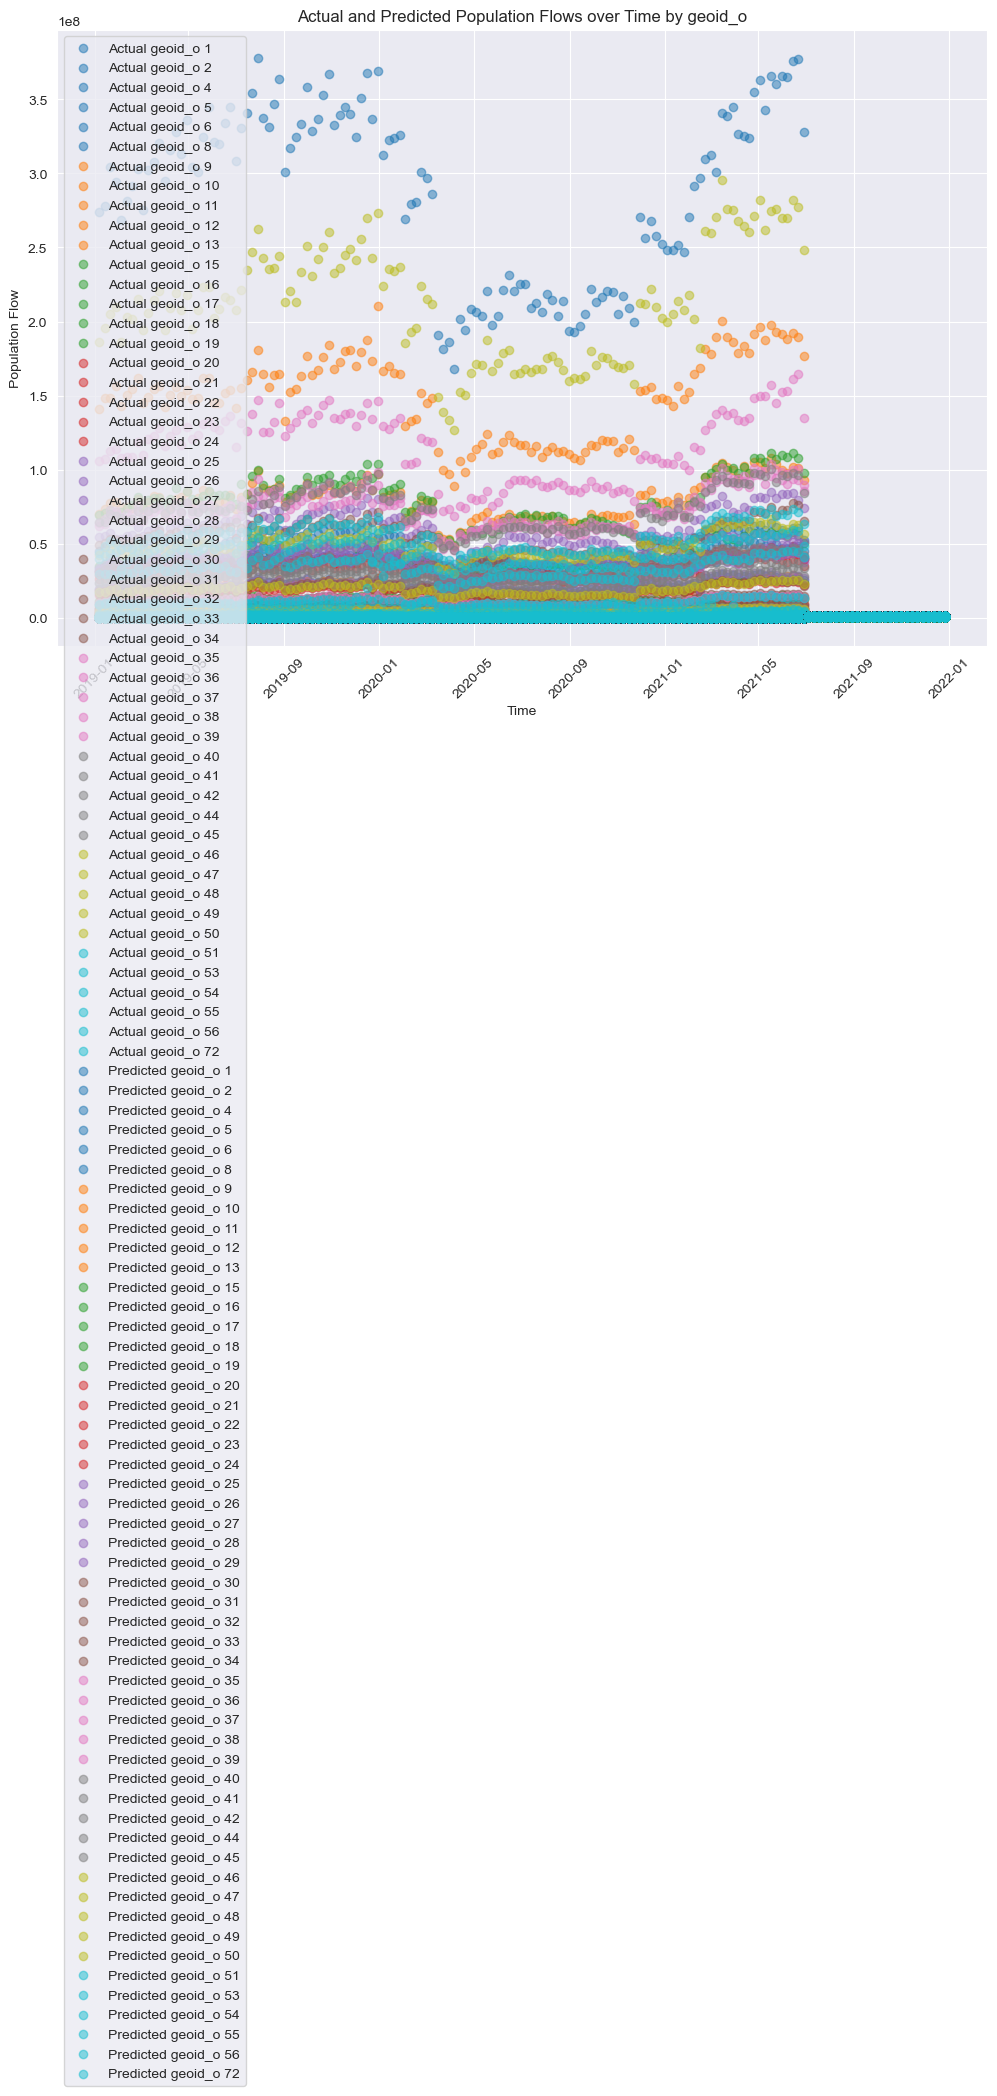

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming cleaned_df and period_df are already defined

# Convert start_date to datetime in cleaned_df
cleaned_df['start_date'] = pd.to_datetime(cleaned_df['start_date'], format='%m/%d/%y')

# Convert start_date to datetime in period_df
period_df['start_date'] = pd.to_datetime(period_df['start_month'].astype(str) + '/' + period_df['start_day'].astype(str) + '/2021')

# Get unique geoid_o values
geoid_o_values_actual = cleaned_df['geoid_o'].unique()
geoid_o_values_predicted = period_df['geoid_o'].unique()

# Define colors for each geoid_o value
colors = plt.cm.tab10(np.linspace(0, 1, max(len(geoid_o_values_actual), len(geoid_o_values_predicted))))

# Plot actual population flows over time by geoid_o
plt.figure(figsize=(12, 8))

for i, geoid_o in enumerate(geoid_o_values_actual):
    df_subset = cleaned_df[cleaned_df['geoid_o'] == geoid_o]
    plt.scatter(df_subset['start_date'], df_subset['pop_flows'], marker='o', label=f'Actual geoid_o {geoid_o}', color=colors[i], alpha=0.5)

# Plot pop_flows_predicted against start_date for each unique value of geoid_o
for i, geoid_o in enumerate(geoid_o_values_predicted):
    data_geoid_o = period_df[period_df['geoid_o'] == geoid_o]
    plt.scatter(data_geoid_o['start_date'], data_geoid_o['pop_flows_predicted'], marker='o', label=f'Predicted geoid_o {geoid_o}', color=colors[i], alpha=0.5)

plt.xlabel('Time')
plt.ylabel('Population Flow')
plt.title('Actual and Predicted Population Flows over Time by geoid_o')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming cleaned_df and period_df are already defined

# Merge cleaned_df and period_df on 'geoid_o'
merged_df = pd.merge(cleaned_df, period_df, on='geoid_o')

# Define features and labels
X = merged_df[['feature1', 'feature2', ...]]  # Define your features
y = merged_df['pop_flows']  # Define your labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Make predictions
# Assuming new_data is a DataFrame containing new data with the same features as X
predictions = model.predict(new_data)

### Polynomial Regression does not provide significant differences in result from Linear Regression Model so we try a different model called XGBoost Model (Extreme Gradient Boost)

# XGBoost

### 2.2 Data Fitting Process (using training data)

Following data preprocessing, the dataset is divided into features (X) and the target variable (y), with the latter representing the population flows. The dataset is then split into training and testing sets using the train_test_split function from scikit-learn, with 80% of the data allocated for training and the remaining 20% reserved for testing. This partitioning strategy ensures an unbiased assessment of the model's performance on unseen data.

To facilitate training with XGBoost, the training and testing data are converted into the specialized data structure required by the algorithm, known as DMatrix, using the xgb.DMatrix function. This format enhances computational efficiency and enables seamless integration with XGBoost's training process.

The XGBoost model is configured using a dictionary named params, where the objective is set to 'reg:squarederror' for regression tasks, and the evaluation metric is specified as 'rmse' (Root Mean Squared Error). These parameters guide the model's learning process and determine the optimization objective during training.

The model is trained using the xgb.train function, which takes the defined parameters (params), training DMatrix (dtrain), and the number of boosting rounds (num_boost_round) as inputs. Boosting rounds refer to the number of iterations during the training process, allowing the model to iteratively improve its performance.

Once trained, the model is utilized to make predictions on the testing set. The Root Mean Squared Error (RMSE) is then calculated to quantify the disparity between the predicted and actual population flows. Lower RMSE values indicate better predictive accuracy, reflecting the model's ability to accurately capture the underlying patterns in the data.

Finally, the computed RMSE value is printed to the console, providing a quantitative assessment of the XGBoost model's performance in predicting population flows. 

In [37]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


data = pd.read_csv("cleaned_df.csv", delimiter = ",")
# If not, load your data into a DataFrame

# Convert start_date to numerical representation (e.g., days since epoch)
data['start_date'] = (pd.to_datetime(data['start_date']) - pd.Timestamp("1970-01-01")).dt.days

# Split features and target variable
X = data.drop(columns=['pop_flows'])
y = data['pop_flows']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the testing set
y_pred = model.predict(dtest)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error (RMSE):', rmse)

/var/folders/h9/ywk3l7f10fnc9g5m401c04h80000gn/T/ipykernel_13891/4116191649.py:11: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Root Mean Squared Error (RMSE): 1352888.5147697846


### 2.3 Prediction by the model

We start the predictions of population flows between different geographical areas from July 2021 to December 2021. It begins by defining the date range using the Pandas pd.date_range function, setting up weekly intervals. This establishes a sequence of dates representing each week within the specified period, enabling a structured temporal framework for prediction.

An empty list, all_predictions, is initialized to accumulate predictions for each combination of geographical areas (geoid_o and geoid_d). The subsequent nested loop iterates over every possible pairing of geoid_o and geoid_d, ranging from 1 to 52. Within this loop, a DataFrame named data_july_to_dec_2021 is created for each combination, containing columns for geoid_o, geoid_d, and start_date.

In data_july_to_dec_2021, the 'start_date' column is populated with the number of days since the epoch (January 1, 1970) for each date within the defined period. This conversion standardizes the representation of dates and ensures compatibility with the XGBoost model.

Subsequently, a DMatrix (dtest_july_to_dec_2021) is created using the XGBoost library to facilitate prediction based on the generated DataFrame. Predictions are then made using the trained XGBoost model for population flows between the specified geographical areas throughout the designated timeframe.

The predictions, along with the corresponding geoid_o, geoid_d, and date information, are appended to the all_predictions list as tuples. This accumulation process allows for the aggregation of forecasts across all combinations of geographical areas and dates.

Once all predictions are generated and stored, a new DataFrame named output_df is constructed from the collected predictions. This DataFrame encapsulates the forecasted population flows, with columns for geoid_o, geoid_d, date, and prediction.

In [39]:
import pandas as pd
from datetime import datetime, timedelta

# Define the period July 2021 to December 2021 with weekly intervals
start_date_july_2021 = datetime(2021, 7, 1)
end_date_dec_2021 = datetime(2021, 12, 31)
dates_july_to_dec_2021 = pd.date_range(start=start_date_july_2021, end=end_date_dec_2021, freq='W')

# Initialize an empty list to store predictions
all_predictions = []

# Loop through each combination of geoid_o and geoid_d from 1 to 52
for geoid_o in range(1, 53):
    for geoid_d in range(1, 53):
        # Create a DataFrame for the period with geoid_o and geoid_d
        data_july_to_dec_2021 = pd.DataFrame({
            'geoid_o': [geoid_o] * len(dates_july_to_dec_2021),
            'geoid_d': [geoid_d] * len(dates_july_to_dec_2021),
            'start_date': [(date - pd.Timestamp("1970-01-01")).days for date in dates_july_to_dec_2021]
        })

        # Create DMatrix for prediction
        dtest_july_to_dec_2021 = xgb.DMatrix(data_july_to_dec_2021)

        # Make predictions using the trained XGBoost model
        predictions = model.predict(dtest_july_to_dec_2021)

        # Append predictions to the list
        all_predictions.extend(zip([geoid_o] * len(dates_july_to_dec_2021), 
                                   [geoid_d] * len(dates_july_to_dec_2021), 
                                   dates_july_to_dec_2021, 
                                   predictions))

# Create a DataFrame from the predictions
output_df = pd.DataFrame(all_predictions, columns=['geoid_o', 'geoid_d', 'date', 'prediction'])

# Display the new dataset
print(output_df)

       geoid_o  geoid_d       date  prediction
0            1        1 2021-07-04  48354980.0
1            1        1 2021-07-11  48354980.0
2            1        1 2021-07-18  48354980.0
3            1        1 2021-07-25  48354980.0
4            1        1 2021-08-01  48354980.0
...        ...      ...        ...         ...
70299       52       52 2021-11-28  58232164.0
70300       52       52 2021-12-05  58232164.0
70301       52       52 2021-12-12  58232164.0
70302       52       52 2021-12-19  58232164.0
70303       52       52 2021-12-26  58232164.0

[70304 rows x 4 columns]


### 2.4 Quantitative Evaluation of the model (using testing data)

This code segment shows a comprehensive evaluation of a predictive model's performance using testing data, followed by a visual exploration of actual and predicted population flows. Initially, the code computes several evaluation metrics crucial for assessing the model's accuracy. These metrics include Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), and R-squared (R2). These metrics collectively offer insights into how well the model's predictions align with the actual population flow data.

Subsequently, the code proceeds to visualize the predicted versus actual values through a scatter plot. Each data point on the plot represents an observation, with the x-axis showcasing the actual population flows and the y-axis indicating the corresponding predicted values. The diagonal dashed line serves as a reference, depicting the scenario where actual and predicted values are perfectly aligned. Such visualization aids in gauging the model's overall predictive performance and identifying any systematic deviations or biases.

Following the visual comparison, the code delves into analyzing the residuals, which are the differences between the actual and predicted values. It generates a residual plot that illustrates the relationship between predicted values and residuals. This plot facilitates the identification of any discernible patterns or trends in the model's errors, such as heteroscedasticity or non-linearity, which can provide valuable insights for model refinement.

Additionally, the code constructs a histogram to visualize the distribution of residuals. By examining the distribution's shape and spread, one can gain a deeper understanding of the model's performance across different ranges of predictions. This visualization aids in assessing the symmetry and magnitude of errors, helping to identify potential areas for improvement in the model.

Lastly, the code transitions to visualizing actual and predicted population flows over time for various geographical areas (geoid_o). It leverages different markers and colors to distinguish between actual and predicted data points, providing a clear depiction of population flow trends. Notably, vertical dashed lines are included to mark significant events, such as the start and end of the COVID-19 pandemic's first wave, offering contextual insights into population dynamics.

Root Mean Squared Error (RMSE): 1352888.5147697846
Mean Absolute Error (MAE): 337584.1001792061
Mean Absolute Percentage Error (MAPE): 7028.839464258683
R-squared (R2): 0.9783210416135366


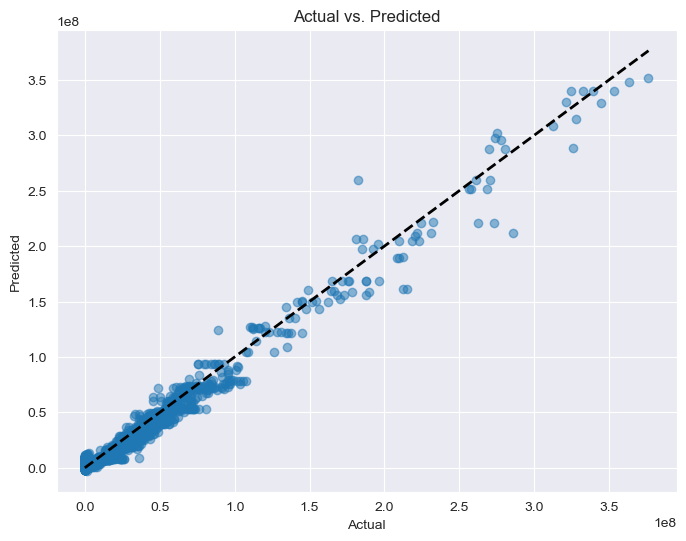

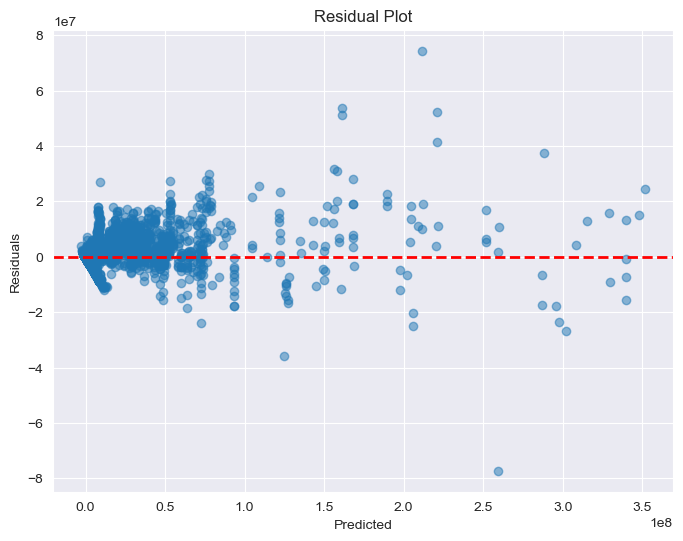

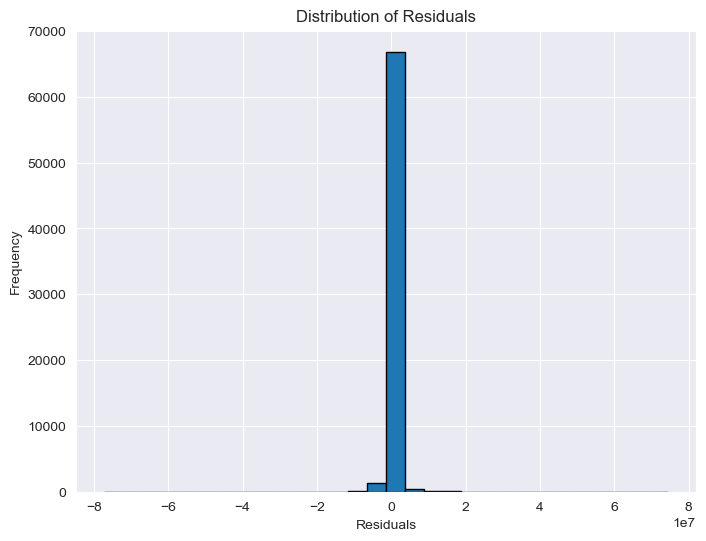

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Calculate metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# Print metrics
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R2):", r2)

# Visualize predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Distribution of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

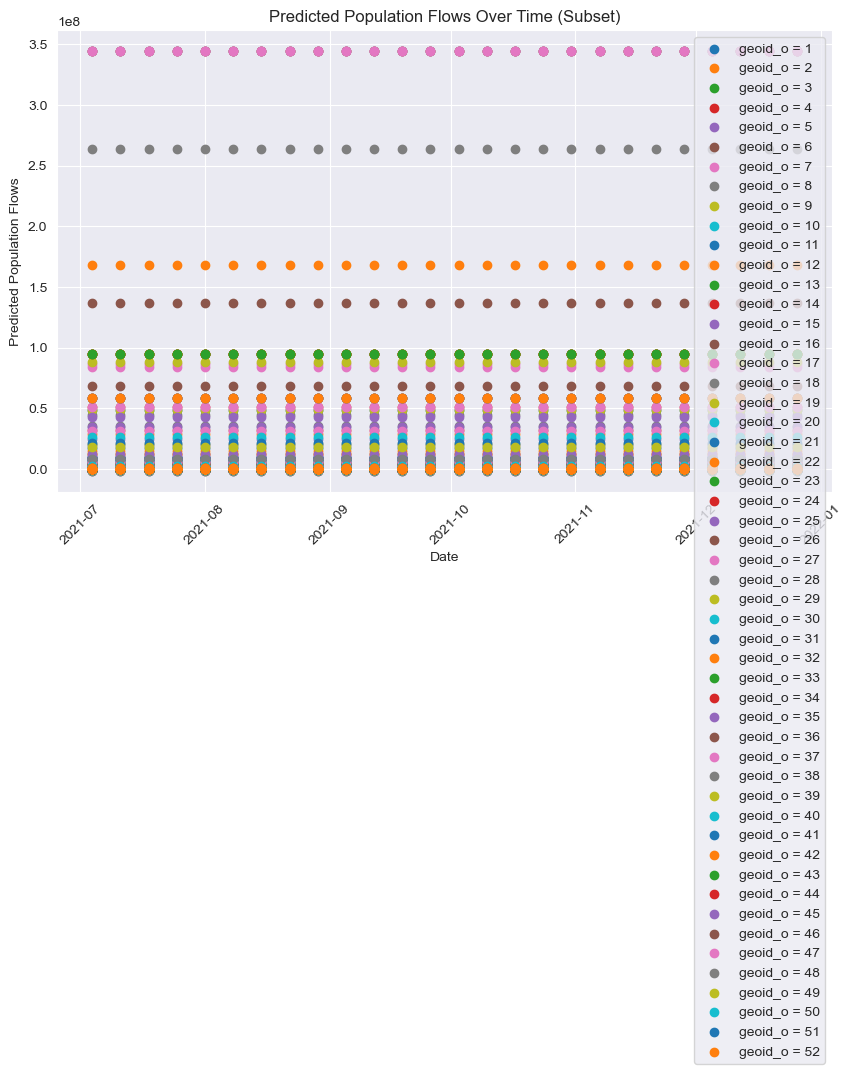

In [45]:
import matplotlib.pyplot as plt

# Convert start_date back to datetime format for the predicted data
output_df['date'] = pd.to_datetime(output_df['date'])

# Get unique geoid_o values
unique_geoid_o = output_df['geoid_o'].unique()

# Plot each unique geoid_o separately
plt.figure(figsize=(10, 6))
for geoid_o in unique_geoid_o:
    # Filter DataFrame for the current geoid_o value
    df_subset = output_df[output_df['geoid_o'] == geoid_o]
    
    # Plot data for the current geoid_o value
    plt.scatter(df_subset['date'], df_subset['prediction'], label=f'geoid_o = {geoid_o}')

plt.xlabel('Date')
plt.ylabel('Predicted Population Flows')
plt.title('Predicted Population Flows Over Time (Subset)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

/var/folders/h9/ywk3l7f10fnc9g5m401c04h80000gn/T/ipykernel_13891/3970996491.py:13: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



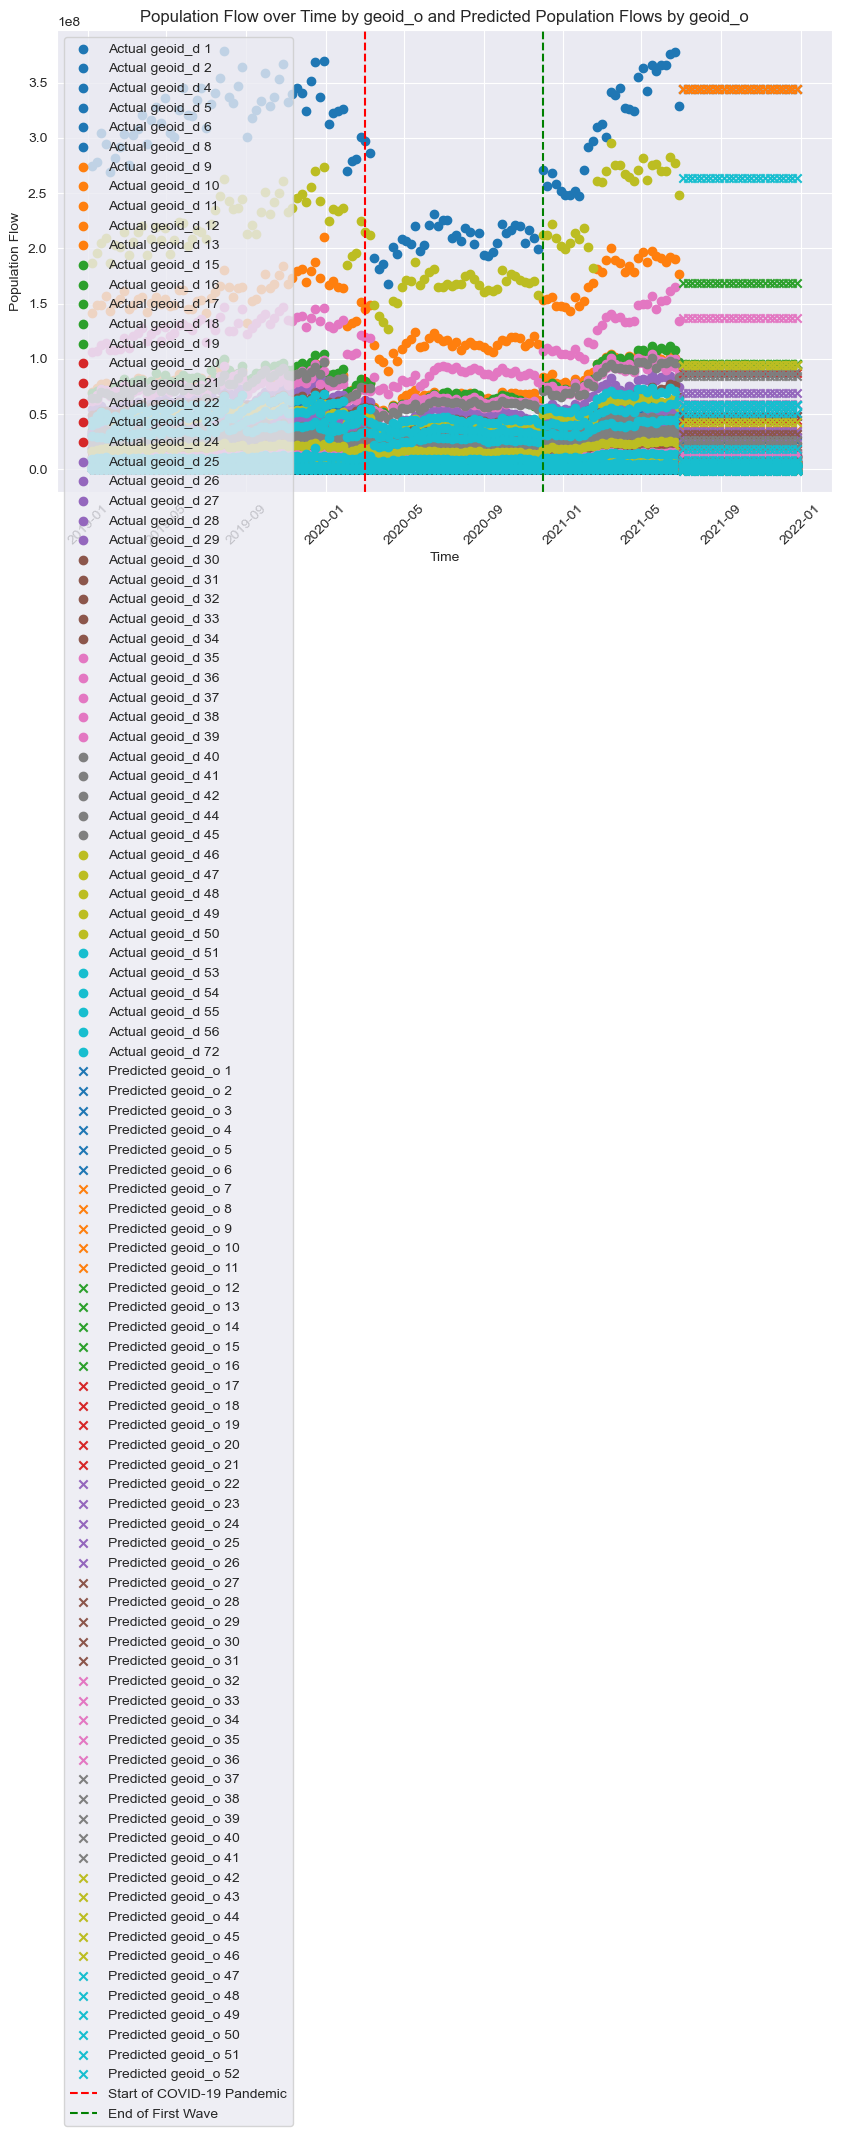

In [59]:
import matplotlib.pyplot as plt

# Convert start_date back to datetime format for the predicted data
output_df['date'] = pd.to_datetime(output_df['date'])

# Get unique geoid_o values
unique_geoid_o = output_df['geoid_o'].unique()

# Get unique geoid_d values from the cleaned_df DataFrame
geoid_o_values = cleaned_df['geoid_o'].unique()

# Define a color map for actual and predicted data
color_map = plt.cm.get_cmap('tab10', len(geoid_o_values))

# Plot actual and predicted population flows together
plt.figure(figsize=(10, 6))

# Plot actual population flows
for i, geoid_o in enumerate(geoid_o_values):
    df_subset = cleaned_df[cleaned_df['geoid_o'] == geoid_o]
    color = color_map(i)
    plt.scatter(df_subset['start_date'], df_subset['pop_flows'], marker='o', color=color, label=f'Actual geoid_d {geoid_o}')

# Plot predicted population flows
for i, geoid_o in enumerate(unique_geoid_o):
    # Filter DataFrame for the current geoid_o value
    df_subset = output_df[output_df['geoid_o'] == geoid_o]
    
    # Plot data for the current geoid_o value
    color = color_map(i)
    plt.scatter(df_subset['date'], df_subset['prediction'], marker='x', color=color, label=f'Predicted geoid_o {geoid_o}')

plt.axvline(pd.to_datetime('2020-03'), color='r', linestyle='--', label='Start of COVID-19 Pandemic')
plt.axvline(pd.to_datetime('2020-12'), color='g', linestyle='--', label='End of First Wave')

plt.xlabel('Time')
plt.ylabel('Population Flow')
plt.title('Population Flow over Time by geoid_o and Predicted Population Flows by geoid_o')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

### 3. Improvement in the Model (Answer to the Further Thoughts

Anomaly detection algorithms are essential in identifying shifts in human mobility patterns amidst COVID-19 lockdowns. These algorithms should meticulously differentiate between pre-lockdown, lockdown, and post-lockdown phases, offering a nuanced understanding of mobility dynamics. By deploying sophisticated anomaly detection techniques, such as time series analysis or clustering methods, anomalies in mobility patterns can be accurately identified, facilitating insights into the impact of lockdown measures on human movement.

To capture the intricacies of mobility changes during distinct lockdown phases, it's essential to devise separate models tailored to each phase. These models should incorporate additional features specific to lockdown periods, such as stay-at-home orders, travel restrictions, or essential service availability. By integrating phase-specific features, the models can accurately capture the unique dynamics of human mobility during different stages of lockdown, enabling precise analysis and prediction of mobility trends.

Addressing data quality issues and potential biases is imperative to enhance the accuracy and reliability of mobility models. Factors such as seasonality, demographics, and economic variables can introduce biases in the data, impacting the model's performance. To mitigate these issues, thorough data preprocessing steps should be employed, including data cleaning, normalization, and feature engineering. Additionally, techniques such as stratified sampling or propensity score matching can help account for demographic biases, ensuring a more representative dataset for modeling.

Continuous monitoring and updating of mobility models are essential to adapt to evolving trends and new data. Models should be regularly retrained using the latest data to capture emerging mobility patterns and account for changing lockdown measures or societal behaviors. Incorporating feedback from domain experts and stakeholders is crucial in refining the modeling approach, ensuring that the models remain relevant and effective in guiding policy decisions and public health interventions. By embracing a proactive approach to model monitoring and updating, mobility models can remain robust and reliable tools for understanding and responding to dynamic mobility patterns during the COVID-19 pandemic and beyond.